In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os

from pathlib import Path
from utils import datasets

HOME = os.path.expanduser('~')

In [2]:
# Get data_paths
train_paths, train_info = datasets.omg_get_paths(HOME + '/Datasets/OMGEmotion/Aligned256/train/')
val_paths, val_info = datasets.omg_get_paths(HOME + '/Datasets/OMGEmotion/Aligned256/validation/')
test_paths, test_info = datasets.omg_get_paths(HOME + '/Datasets/OMGEmotion/Aligned256/test/')

print(len(train_paths), len(val_paths), len(test_paths))

1607 332 1610


## Number of frames

In [13]:
def count_frames(paths, data_type):
    len_frames = [len(p) for p in paths]
    print(f"{data_type}: {np.array(len_frames).sum()} frames")
    
count_frames(train_paths, 'train')
count_frames(val_paths, 'val')
count_frames(test_paths, 'test')

train: 246928 frames
val: 51115 frames
test: 277591 frames


## Emotion distribution

train counts [612 381 292 189  47  75  14]


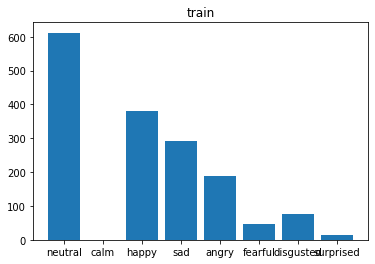

val counts [105  89  53  41   7  33   4]


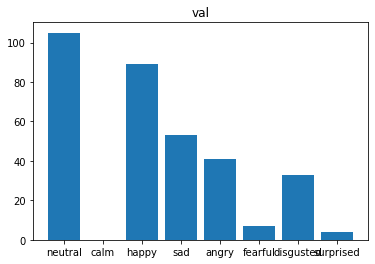

test counts [541 446 196 292  43  82  10]


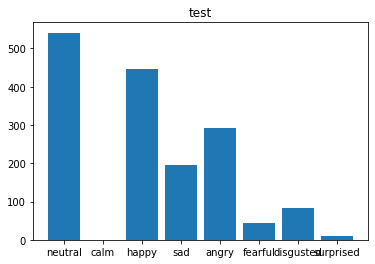

In [6]:
def class_distribution(info, data_type):
    emotions = info.EmotionMaxVote.to_numpy()
    unique, counts = np.unique(emotions, return_counts=True)
    print(f"{data_type} counts {counts}")
    plt.bar(unique, counts)
    plt.title(data_type)
    plt.xticks(np.arange(8), ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgusted', 'surprised'])
    plt.show()
    
class_distribution(train_info, 'train')
class_distribution(val_info, 'val')
class_distribution(test_info, 'test')

## Valence and arousal distribution

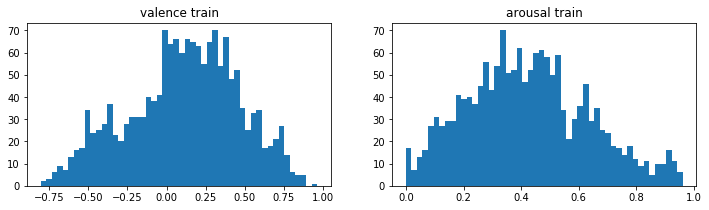

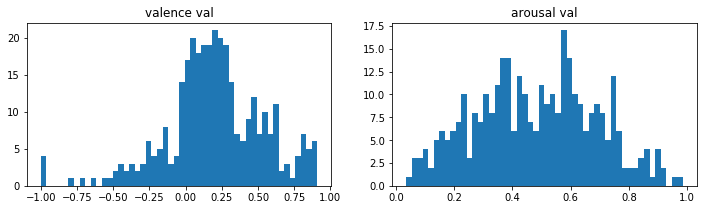

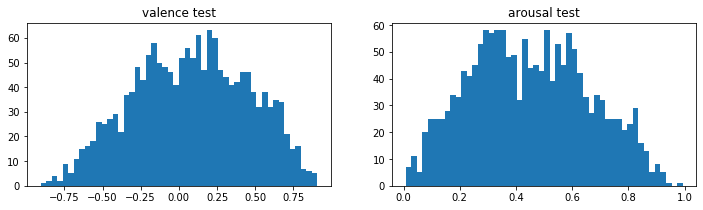

In [29]:
def valence_arousal_distribution(info, data_type):
    valence = info.valence.to_numpy()
    arousal = info.arousal.to_numpy()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))
    
    ax1.hist(valence, bins=50)
    ax1.set_title(f"valence {data_type}")
    ax2.hist(arousal, bins=50)
    ax2.set_title(f"arousal {data_type}")
    plt.show()
    
valence_arousal_distribution(train_info, 'train')
valence_arousal_distribution(val_info, 'val')
valence_arousal_distribution(test_info, 'test')